# Twitter Sentiment Analysis

In [94]:
#This is a sentiment analysis program that parses tweets fetched from Twitter using Python

In [226]:
#Importing libraries

import tweepy
from textblob import TextBlob
from wordcloud import WordCloud
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt

In [227]:
log=pd.read_csv("login1.csv")

In [228]:
#Twitter API credentials

apiKey = log['key'][0]
apiKeySecret = log['key'][1]
accessToken = log['key'][2]
accessTokenSecret = log['key'][3]
bearerToken = log['key'][4]

In [229]:
#Create the API object while passing in the authentication information

client = tweepy.Client(bearer_token=bearerToken)

In [296]:
#The topic chosen for the sentiment analysis is the Indian economy

query = "indian economy -is:retweet"
response = client.search_recent_tweets(query=query, max_results=100)

#Show the top 20 tweets

i=1;
for tweet in response.data:
    print(str(i)+')'+tweet.text)
    if(i==20):
        break
    i=i+1

1)Please do follow @kap_bee , a new account of Bhavika Kapoor , waisey tou naam hi kaafi hai inka.She is staunch supporter of Congress party (RaGa ) . She is a symbol of or example of Ganga- Jamuna Tahzeeb ,very down to earth .She has great concerned about Indian Economy. Jai Hind.
2)@JPNadda @narendramodi @_DigitalIndia Today great resolutions for jpnadda ji at pmmodi ji great leadership for support more increase digital economy resolutions to empowerment all sarvices to fastest technologies to one finger for 135crore Indian people to digital connectivity to economy more effort to future generat
3)@daniel86cricket @englandcricket Uff man what’s the price of fuel in Sri Lanka? Oh shit you don’t have fuel to use.. isn’t it? And btw how much debt your country have in last 3 years 😂😂😂 more than Indian economy I guess.
4)@dna This number is a joke like the $30T Indian economy. 

https://t.co/A0h1bRy1pU
5)@dhananjayachak Indian Pacers in 4th inns of the 3 OS Tests dis year
Runs: 663
Wkts: 7

In [271]:
#Create a dataframe with a column called tweets
df = pd.DataFrame([tweet.text for tweet in response.data], columns=['Tweets'])

#Show the first 5 rows
df.head()

,Tweets
0,"Please do follow @kap_bee , a new account of B..."
1,@JPNadda @narendramodi @_DigitalIndia Today gr...
2,@daniel86cricket @englandcricket Uff man what’...
3,@dna This number is a joke like the $30T India...
4,@dhananjayachak Indian Pacers in 4th inns of t...


### Hashtag Analysis

In [272]:
#Function to extract hashtags from the tweets
def find_hashtags(tweet):
    return re.findall('(#[A-Za-z]+[A-Za-z0-9-_]+)', tweet)

df['Hashtags'] = df['Tweets'].apply(find_hashtags)

#Show the updated dateframe with 'Hashtags' column
df

,Tweets,Hashtags
0,"Please do follow @kap_bee , a new account of B...",[]
1,@JPNadda @narendramodi @_DigitalIndia Today gr...,[]
2,@daniel86cricket @englandcricket Uff man what’...,[]
3,@dna This number is a joke like the $30T India...,[]
4,@dhananjayachak Indian Pacers in 4th inns of t...,[]
...,...,...
94,@Rajoo_Bhau 😂 just like Sri Lanka ; wait and w...,[]
95,@SureshSharma798 @pantlp 1$=79 ₹ it's no where...,[]
96,"@NavneetRana_ Navneet Ji, I feel personally yo...",[]
97,@PiyushGoyal @narendramodi No where in world h...,[]


In [273]:
#Create a seperate dataframe for hashtags

hashtag_list = df['Hashtags'].to_list()
flat_hashtags_df = pd.DataFrame([item for sublist in hashtag_list for item in sublist])
flat_hashtags_df.columns = ['Hashtags']

#Display the top 5 entries of the dataframe

flat_hashtags_df.head()

,Hashtags
0,#BusinessToday
1,#Market
2,#InterestRates
3,#Inflation
4,#Nifty


In [274]:
print("Total hashtags: ", len(flat_hashtags_df['Hashtags']))
print("Repeated hashtags: ", len(flat_hashtags_df['Hashtags'].unique()))

Total hashtags:  62
Repeated hashtags:  55


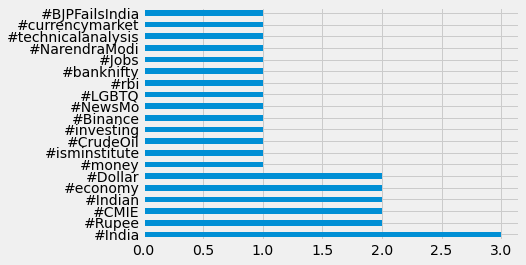

In [275]:
#Plot the occurence of each hashtag

flat_hashtags_df['Hashtags'].value_counts()[:20].plot(kind='barh')

### Polarity and subjectivity analysis

In [276]:
#Clean the text

def cleanText(text):
    text = re.sub(r'@[A-Za-z0-9]+','', text) #Remove @mentions
    text = re.sub(r'#+', '', text) #Removing the # symbol
    text = re.sub(r'RT[\s]', '', text) #Removing RT
    text = re.sub(r'https?:\/\/\S+','',text) #Removing hyperlinks
    text = re.sub(r'\n', '', text) #Remving the new line character
    return text

#Using the function cleanText to clean the tweet

df['Tweets']=df['Tweets'].apply(cleanText)

#Show the cleaned text
df = df.drop('Hashtags',axis=1)
df

,Tweets
0,"Please do follow _bee , a new account of Bhavi..."
1,@_DigitalIndia Today great resolutions for j...
2,Uff man what’s the price of fuel in Sri Lank...
3,This number is a joke like the $30T Indian ec...
4,Indian Pacers in 4th inns of the 3 OS Tests d...
...,...
94,_Bhau 😂 just like Sri Lanka ; wait and watch y...
95,1$=79 ₹ it's no where related with Nupur Sha...
96,"_ Navneet Ji, I feel personally you are a good..."
97,No where in world has seen so a minister who...


In [277]:
#Create a function to get the subjectivity of the text

def getSubjectivity(text):
    return TextBlob(text).sentiment.subjectivity

#Create a function to get the polarity

def getPolarity(text):
    return TextBlob(text).sentiment.polarity

#Create two new columns
df['Subjectivity'] = df['Tweets'].apply(getSubjectivity)
df['Polarity'] = df['Tweets'].apply(getPolarity)

#Show the new dataframe with updated columns
df

,Tweets,Subjectivity,Polarity
0,"Please do follow _bee , a new account of Bhavi...",0.526700,0.244714
1,@_DigitalIndia Today great resolutions for j...,0.375000,0.371429
2,Uff man what’s the price of fuel in Sri Lank...,0.391667,0.125000
3,This number is a joke like the $30T Indian ec...,0.000000,0.000000
4,Indian Pacers in 4th inns of the 3 OS Tests d...,0.333333,0.166667
...,...,...,...
94,_Bhau 😂 just like Sri Lanka ; wait and watch y...,0.000000,0.000000
95,1$=79 ₹ it's no where related with Nupur Sha...,0.300000,0.166667
96,"_ Navneet Ji, I feel personally you are a good...",0.466667,0.310000
97,No where in world has seen so a minister who...,0.925000,0.058333


(-0.5, 499.5, 299.5, -0.5)

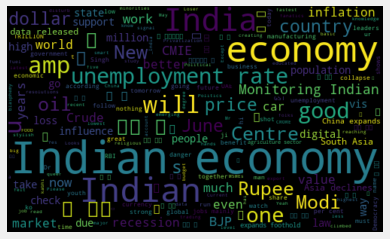

In [278]:
#Plot the word cloud

allWords = ' '.join([twts for twts in df['Tweets']])

wordCloud = WordCloud(width=500, height=300, random_state=21, max_font_size=119).generate(allWords)

plt.imshow(wordCloud, interpolation='bilinear')
plt.axis('off')

In [279]:
#Create a function to compute the negative, neutral and positive analysis

def getAnalysis(score):
    if score<0:
        return 'Negative'
    elif score==0:
        return 'Neutral'
    else:
        return 'Positive'
    
df['Analysis'] = df['Polarity'].apply(getAnalysis)
    
#Show the dataframe
df    

,Tweets,Subjectivity,Polarity,Analysis
0,"Please do follow _bee , a new account of Bhavi...",0.526700,0.244714,Positive
1,@_DigitalIndia Today great resolutions for j...,0.375000,0.371429,Positive
2,Uff man what’s the price of fuel in Sri Lank...,0.391667,0.125000,Positive
3,This number is a joke like the $30T Indian ec...,0.000000,0.000000,Neutral
4,Indian Pacers in 4th inns of the 3 OS Tests d...,0.333333,0.166667,Positive
...,...,...,...,...
94,_Bhau 😂 just like Sri Lanka ; wait and watch y...,0.000000,0.000000,Neutral
95,1$=79 ₹ it's no where related with Nupur Sha...,0.300000,0.166667,Positive
96,"_ Navneet Ji, I feel personally you are a good...",0.466667,0.310000,Positive
97,No where in world has seen so a minister who...,0.925000,0.058333,Positive


In [295]:
#Print all of the positive tweets
j=1;
sortedDF = df.sort_values(by=['Polarity'])

for i in range(0,df.shape[0]):
    if(sortedDF['Analysis'][i]=='Positive'):
        print(str(j)+') '+sortedDF['Tweets'][i])
        print()
        j=j+1

1) Please do follow _bee , a new account of Bhavika Kapoor , waisey tou naam hi kaafi hai inka.She is staunch supporter of Congress party (RaGa ) . She is a symbol of or example of Ganga- Jamuna Tahzeeb ,very down to earth .She has great concerned about Indian Economy. Jai Hind.

2)   @_DigitalIndia Today great resolutions for jpnadda ji at pmmodi ji great leadership for support more increase digital economy resolutions to empowerment all sarvices to fastest technologies to one finger for 135crore Indian people to digital connectivity to economy more effort to future generat

3)   Uff man what’s the price of fuel in Sri Lanka? Oh shit you don’t have fuel to use.. isn’t it? And btw how much debt your country have in last 3 years 😂😂😂 more than Indian economy I guess.

4)  Indian Pacers in 4th inns of the 3 OS Tests dis yearRuns: 663Wkts: 7Avg: 94.71ER: 3.99Bhai bumrah 4+ economy se run kha rha thaBaanki ko kya hi boleinKabhi elgar..kabhi peterson 2.0 kabhi bairstow..Root toh tha hiHadd h

In [288]:
#Print the negative tweets
j=1;
sortedDF = df.sort_values(by=['Polarity'], ascending='false')

for i in range(0,sortedDF.shape[0]):
    if(sortedDF['Analysis'][i]=='Negative'):
        print(str(j)+') '+sortedDF['Tweets'][i])
        print()
        j=j+1

1)    It’s a loss because those same educated smart people would be generating much more than that in india. Indian economy and manufacturing would be even better if the educated weren’t forced to leave the horribly run country

2)   Your basic understanding of Indian economy really sucks. Moreover, you don't seem to follow the recent developments. Nobody gets a job showing a degree(at least in STEM) these days. The same fake degree holders are creating unicorns here.Don't behave like an imbecile commie!

3)  You should have ask follow up question to this smart gentleman why Indian currency is worst in Asia.. it’s not black or white🤦🏽 

4)  _indi  Rupee decline is not a negative for Indian economy. Search on google and read major economists view of this. Current account deficit is majorly due to high oil prices and high gold imports (due to curbing of illegally smuggling in recent years).

5) Brent crude oil down 9.90% ⤵️Irrespective of how the market reacts tomorrow, it's a relief for

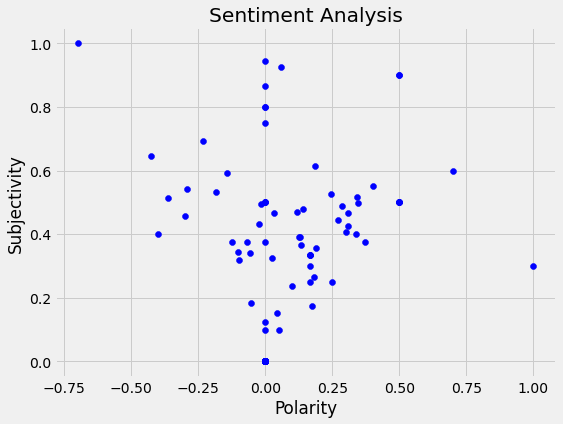

In [289]:
#Plot the polarity and subjectivity
plt.figure(figsize=(8,6))
for i in range(0, df.shape[0]):
    plt.scatter(df['Polarity'][i], df['Subjectivity'][i], color='Blue')
    
plt.title('Sentiment Analysis')
plt.xlabel('Polarity')
plt.ylabel('Subjectivity')
plt.show()

In [290]:
#Get the percentage of positive tweets

ptweets = df[df.Analysis == 'Positive']
ptweets = ptweets['Tweets']
round ((ptweets.shape[0]/df.shape[0])*100, 1)

40.4

In [291]:
#Get the percentage of negative tweets

ntweets = df[df.Analysis == 'Negative']
ntweets = ntweets['Tweets']
round ((ntweets.shape[0]/df.shape[0])*100, 1)

17.2

In [292]:
#Get the percentage of neutral tweets
nltweets = df[df.Analysis == 'Neutral']
nltweets = nltweets['Tweets']

round ((nltweets.shape[0]/df.shape[0])*100, 1)

42.4

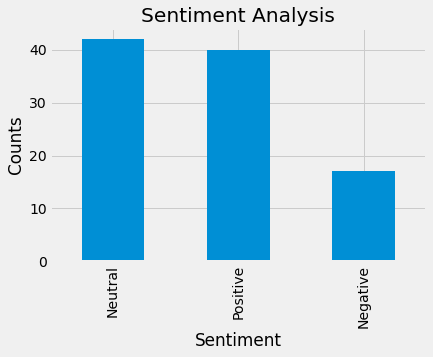

In [293]:
#Show the value counts

df['Analysis'].value_counts()

#Plot and visualize the value counts
plt.title('Sentiment Analysis')
plt.xlabel('Sentiment')
plt.ylabel('Counts')
df['Analysis'].value_counts().plot(kind='bar')
plt.show()